In [1]:
import pandas as pd  # Library for data manipulation and analysis
import numpy as np  # Library for numerical operations
from sklearn.preprocessing import StandardScaler  # Tool for standardizing data
from sklearn.cluster import KMeans  # K-Means clustering algorithm
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Data visualization library based on matplotlib

In [2]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv("Spotify-2000.csv")
# Display the first few rows of the dataset
print(data.head())

   Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0        11       68          

In [4]:
# Drop columns that are not needed for clustering
data = data.drop(columns=['Title', 'Artist', 'Top Genre', 'Year'], errors='ignore')


In [5]:
# Remove rows with missing values
data = data.dropna()

In [6]:
# Remove commas from string numbers and convert them to float
data = data.replace(',', '', regex=True).astype(float)

In [7]:
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the data to standardize it
data_scaled = scaler.fit_transform(data)

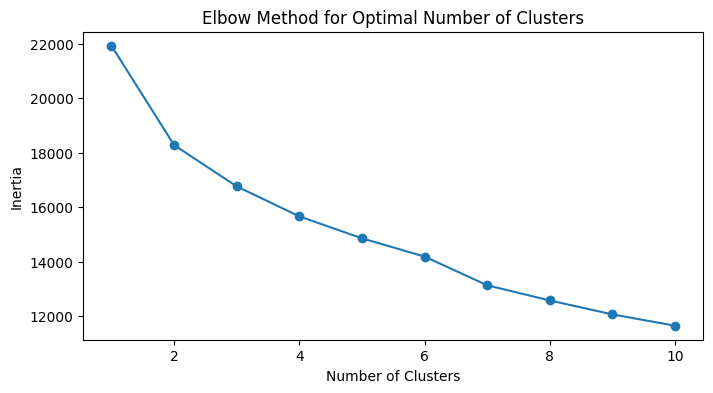

In [8]:
# List to store the inertia values for each number of clusters
inertia = []
# Test cluster sizes from 1 to 10
for n in range(1, 11):
    # Initialize KMeans with n clusters
    kmeans = KMeans(n_clusters=n, random_state=42)
    # Fit the model to the scaled data
    kmeans.fit(data_scaled)
    # Append the inertia (sum of squared distances) to the list
    inertia.append(kmeans.inertia_)

# Plot the inertia values to visualize the elbow point
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [9]:
# Set the optimal number of clusters as determined from the Elbow Method
optimal_clusters = 6
# Initialize KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
# Fit the model and predict cluster labels
data['Cluster'] = kmeans.fit_predict(data_scaled)


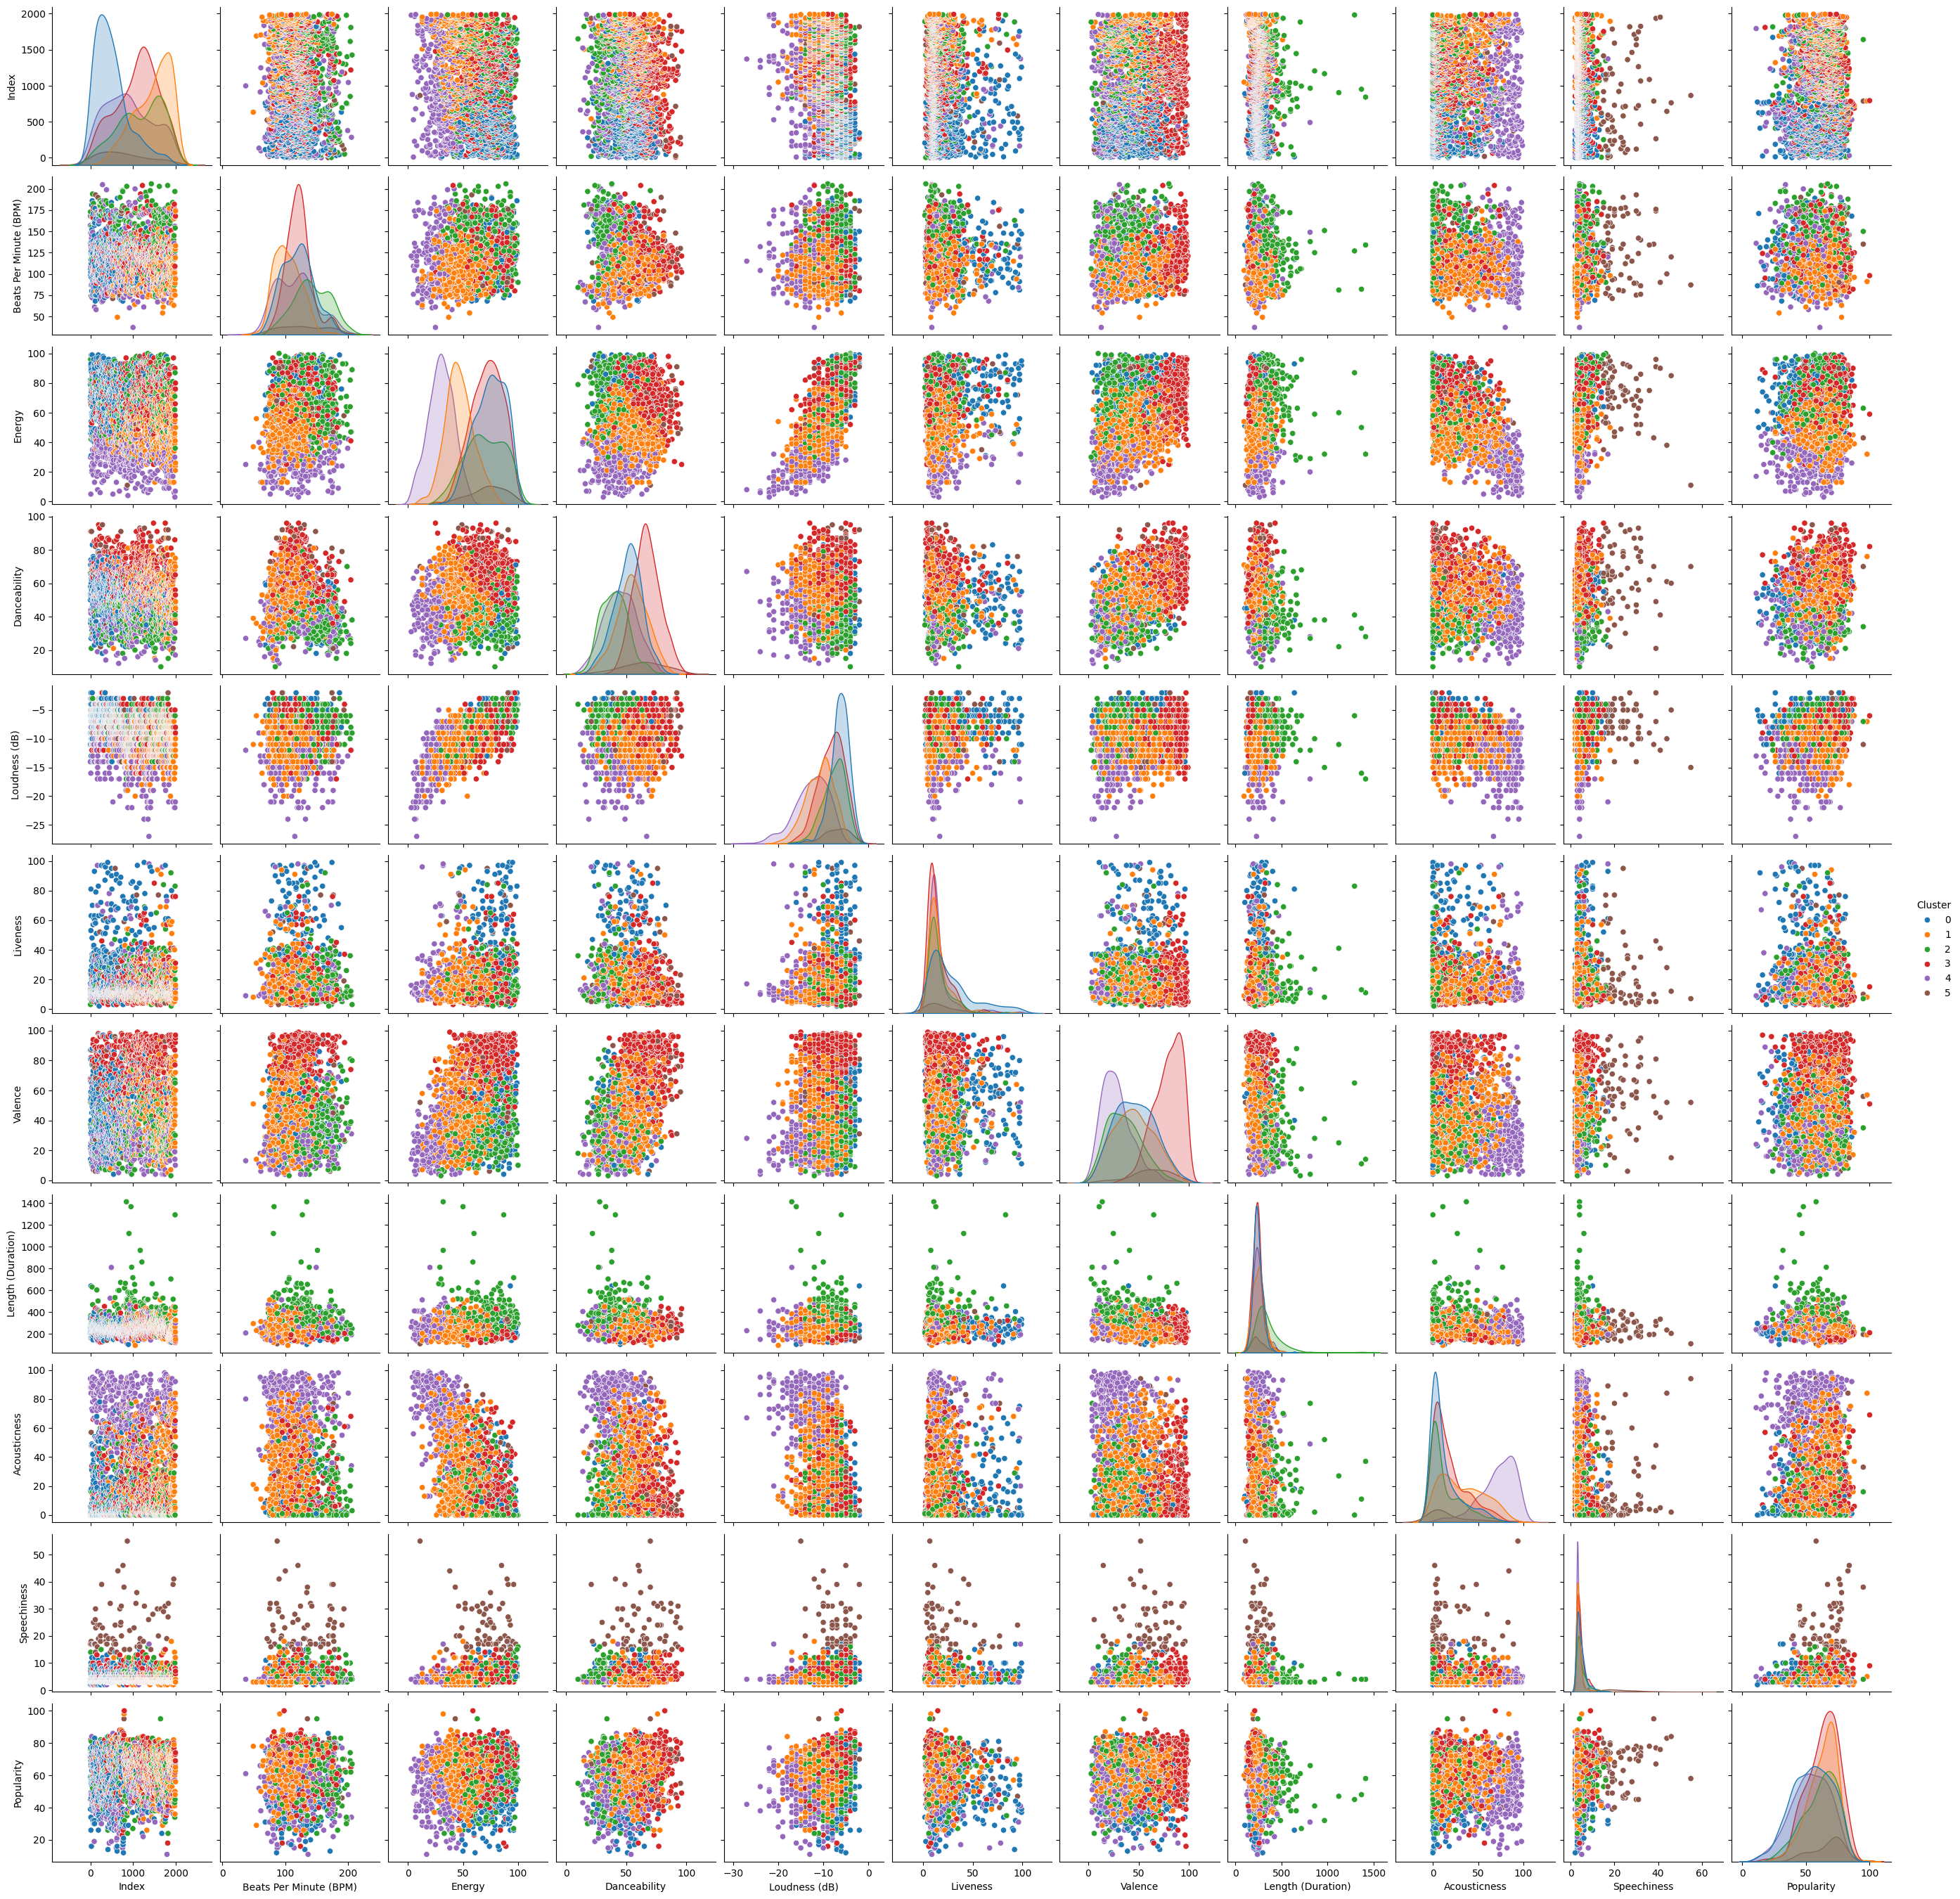

In [10]:
# Create a pairplot to visualize the clusters
sns.pairplot(data, hue='Cluster', palette='tab10')
plt.show()
